<a href="https://colab.research.google.com/github/aarsh-12/BCS_Drowsiness_Detection/blob/main/MAT_TO_MNE/MAT_to_MNE_Aarsh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.io as sio
import numpy as np

In [ ]:
data = sio.loadmat('/content/drive/MyDrive/mat2mne.mat') ## loading our data into data variable

In [ ]:
data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'cnt', 'nfo'])

## checking what our data looks like

In [ ]:
data['mrk']['y']

array([[array([[ 1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,
                -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
                -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,
                 1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
                 1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,
                -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,
                 1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1,
                -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
                -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,
                 1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
                 1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,
                -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,
                -1,  1, -1, -1, -1,  1, 

In [ ]:
data['mrk']['pos']

array([[array([[  2091,   2891,   3691,   4491,   5291,   6091,   6891,   7692,
                  8492,   9292,  10092,  10892,  11692,  12492,  13292,  16294,
                 17094,  17894,  18694,  19494,  20294,  21094,  21894,  22694,
                 23494,  24294,  25094,  25894,  26694,  27494,  30495,  31295,
                 32095,  32895,  33695,  34495,  35295,  36095,  36895,  37695,
                 38495,  39295,  40095,  40895,  41695,  44696,  45496,  46296,
                 47096,  47896,  48696,  49496,  50296,  51096,  51896,  52696,
                 53496,  54296,  55096,  55896,  58895,  59695,  60495,  61295,
                 62095,  62895,  63695,  64495,  65295,  66095,  66895,  67695,
                 68495,  69295,  70095,  73094,  73894,  74694,  75495,  76295,
                 77095,  77895,  78695,  79495,  80295,  81095,  81895,  82695,
                 83495,  84295,  87294,  88094,  88894,  89694,  90494,  91294,
                 92094,  92894,  93694, 

In [ ]:
data['cnt']

array([[  -3,   -3,   -3, ...,    2,    7,    5],
       [ -25,  -21,  -26, ...,   19,   60,   45],
       [ -34,  -15,  -52, ...,   37,  130,   98],
       ...,
       [2524, 2672, 2347, ..., 1167, 1620, 1205],
       [2561, 2706, 2385, ..., 1249, 1693, 1210],
       [2606, 2759, 2457, ..., 1366, 1838, 1263]], dtype=int16)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
cnt = data['cnt']
cnt_1 = 0.1 * cnt.astype(np.float64)  # converting the data into proper untis(to microvolts)

In [ ]:
nfo = data['nfo']
sampling_rate = nfo['fs'][0, 0][0, 0]
c_lab = [c[0] for c in nfo['clab'][0, 0][0]]
classes = [c[0] for c in nfo['classes'][0, 0][0]]   ## defining and intializing few variables we'll need in future

In [ ]:
classes

['left', 'foot']

In [ ]:
sampling_rate

100

In [ ]:
c_lab

['AF3',
 'AF4',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'FC5',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'FC6',
 'CFC7',
 'CFC5',
 'CFC3',
 'CFC1',
 'CFC2',
 'CFC4',
 'CFC6',
 'CFC8',
 'T7',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'CCP7',
 'CCP5',
 'CCP3',
 'CCP1',
 'CCP2',
 'CCP4',
 'CCP6',
 'CCP8',
 'CP5',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'CP6',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'PO1',
 'PO2',
 'O1',
 'O2']

In [ ]:
time = np.arange(cnt_1.shape[0]) / sampling_rate
time       ## making the time array

array([0.00000e+00, 1.00000e-02, 2.00000e-02, ..., 1.90591e+03,
       1.90592e+03, 1.90593e+03])

In [ ]:
num_channels_to_plot = 10
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<ipython-input-20-d0ac8fbc68d3>:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


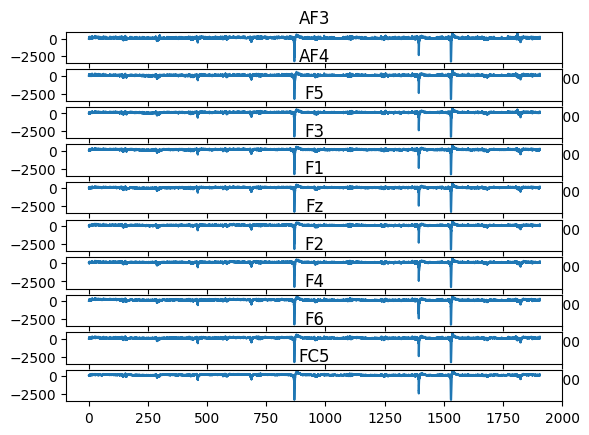

In [ ]:
for i in range(num_channels_to_plot):
    plt.subplot(num_channels_to_plot, 1, i+1)
    plt.plot(time, cnt_1[:, i])
    plt.title(c_lab[i])


plt.tight_layout()
plt.show()  ## visualizing our dataa

In [ ]:
!pip install mne
import mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 9.7 MB/s eta 0:00:00


In [ ]:
n_channels = len(c_lab)
n_channels

59

In [ ]:
info = mne.create_info(ch_names=c_lab, sfreq=sampling_rate, ch_types='eeg')  ##Creating our info object (to later get the raw data)
info.ch_names

['AF3',
 'AF4',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'FC5',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'FC6',
 'CFC7',
 'CFC5',
 'CFC3',
 'CFC1',
 'CFC2',
 'CFC4',
 'CFC6',
 'CFC8',
 'T7',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'CCP7',
 'CCP5',
 'CCP3',
 'CCP1',
 'CCP2',
 'CCP4',
 'CCP6',
 'CCP8',
 'CP5',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'CP6',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'PO1',
 'PO2',
 'O1',
 'O2']

In [ ]:
raw = mne.io.RawArray(cnt_1.T, info)

Creating RawArray with float64 data, n_channels=59, n_times=190594
    Range : 0 ... 190593 =      0.000 ...  1905.930 secs
Ready.


Using matplotlib as 2D backend.


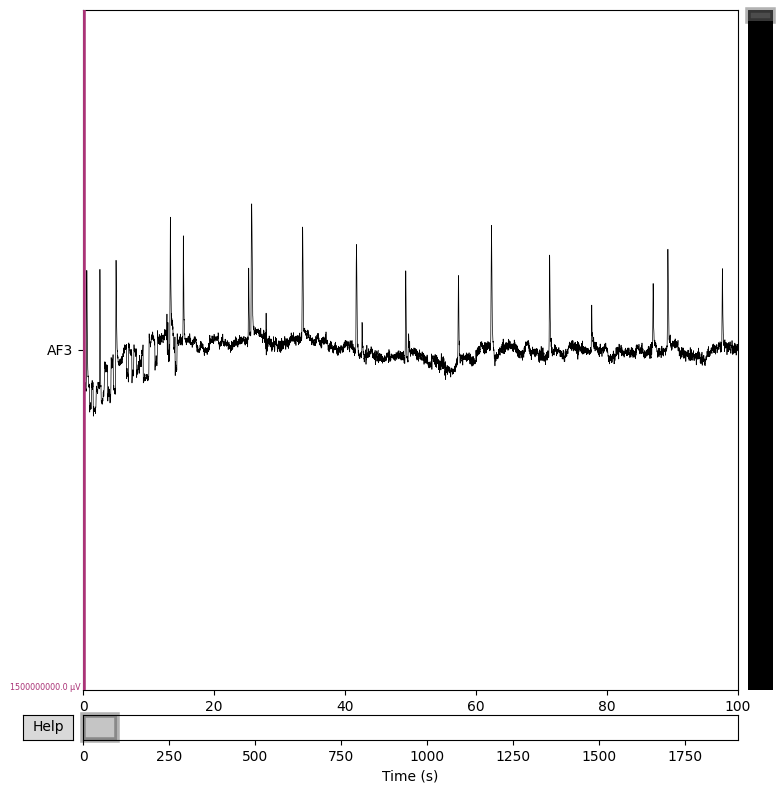

In [ ]:
raw.plot(duration=100.0, scalings={'eeg': 750}, n_channels=1);   #visualizing our raw data from 1 channel


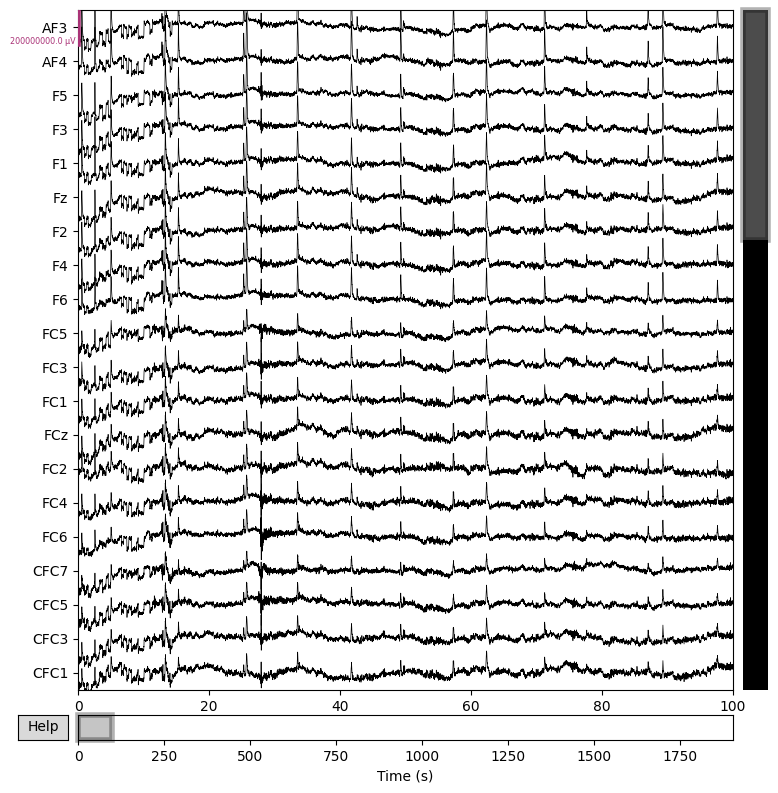

In [ ]:
raw.plot(duration=100.0, scalings={'eeg': 100});  #visualizing our raw data from more channels

Effective window size : 20.480 (s)
Plotting power spectral density (dB=True).


<ipython-input-27-cb839fd9b38d>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.compute_psd().plot();
<ipython-input-27-cb839fd9b38d>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot();


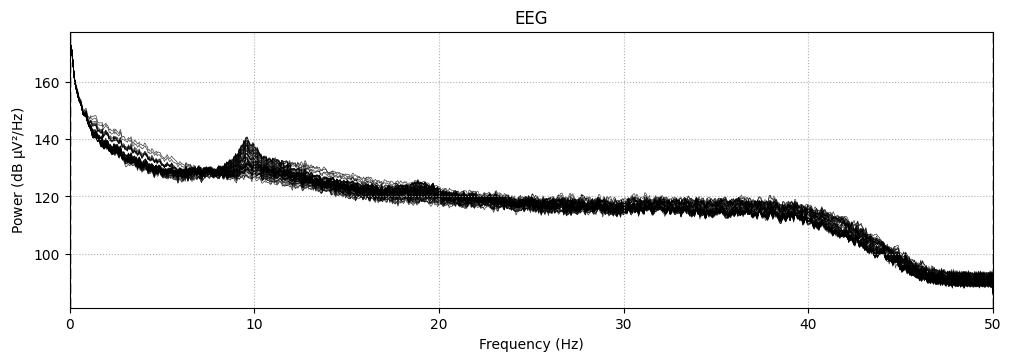

In [ ]:
raw.compute_psd().plot();  # checking the psd plot

In [ ]:
raw.filter(1,35) ## filtering

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 331 samples (3.310 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


<RawArray | 59 x 190594 (1905.9 s), ~85.9 MB, data loaded>

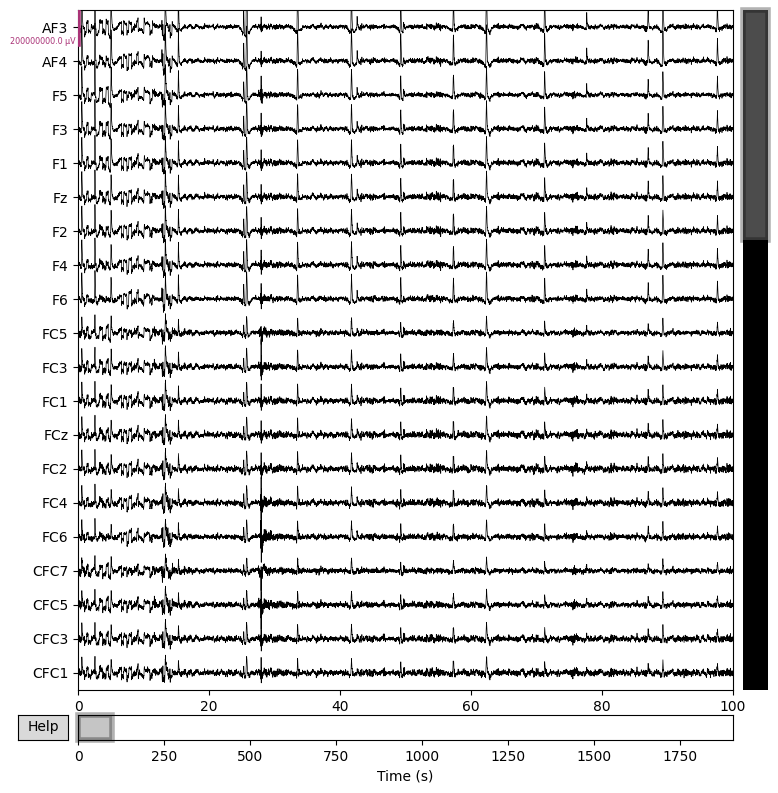

In [ ]:
raw.plot(duration=100.0, scalings={'eeg': 100});

Effective window size : 20.480 (s)
Plotting power spectral density (dB=True).


<ipython-input-30-cb839fd9b38d>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.compute_psd().plot();
<ipython-input-30-cb839fd9b38d>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot();


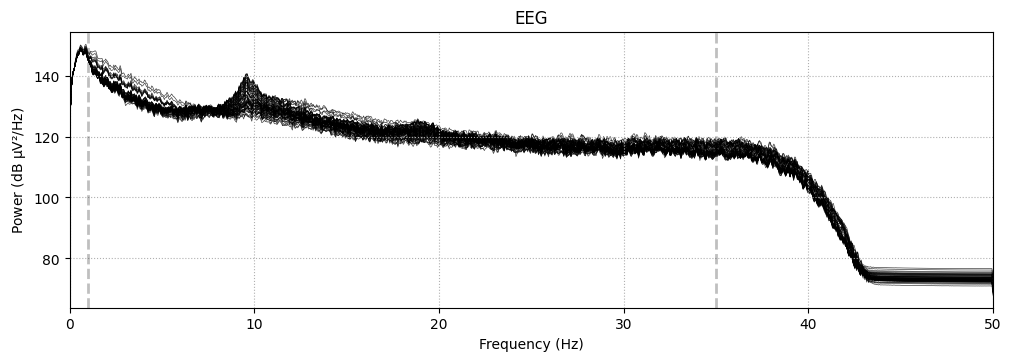

In [ ]:
raw.compute_psd().plot();

In [ ]:
xpos = nfo['xpos'][0, 0].flatten()
ypos = nfo['ypos'][0, 0].flatten()
xpos     ### defing the xpos and ypos variable which has the locations of our electrodes

array([-0.20109028,  0.20109028, -0.48547489, -0.32894737, -0.16535231,
        0.        ,  0.16535231,  0.32894737,  0.48547489, -0.60591541,
       -0.39919579, -0.19765935,  0.        ,  0.19765935,  0.39919579,
        0.60591541, -0.74834683, -0.52472976, -0.30963911, -0.10226303,
        0.10226303,  0.30963911,  0.52472976,  0.74834683, -0.87719298,
       -0.64569058, -0.421549  , -0.20773757,  0.        ,  0.20773757,
        0.421549  ,  0.64569058,  0.87719298, -0.74834683, -0.52472976,
       -0.30963911, -0.10226303,  0.10226303,  0.30963911,  0.52472976,
        0.74834683, -0.60591541, -0.39919579, -0.19765935,  0.        ,
        0.19765935,  0.39919579,  0.60591541, -0.48547489, -0.32894737,
       -0.16535231,  0.        ,  0.16535231,  0.32894737,  0.48547489,
       -0.10395865,  0.10395865, -0.17113186,  0.17113186])

In [ ]:
positions = np.vstack([xpos, ypos, np.zeros(len(c_lab))]).T
positions.shape   # storing our positions in an array

(59, 3)

In [ ]:
montage = mne.channels.make_dig_montage(ch_pos=dict(zip(c_lab, positions)))
info.set_montage(montage)   ## including the position our electrodes in our info object

<ipython-input-42-01f8caa188c5>:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  info.set_montage(montage)


<Info | 8 non-empty values
 bads: []
 ch_names: AF3, AF4, F5, F3, F1, Fz, F2, F4, F6, FC5, FC3, FC1, FCz, FC2, ...
 chs: 59 EEG
 custom_ref_applied: False
 dig: 62 items (3 Cardinal, 59 EEG)
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 59
 projs: []
 sfreq: 100.0 Hz
>

In [ ]:
raw = mne.io.RawArray(cnt_1.T, info) ## recreating our raw object after including the location of electrodes

Creating RawArray with float64 data, n_channels=59, n_times=190594
    Range : 0 ... 190593 =      0.000 ...  1905.930 secs
Ready.


In [ ]:
ica = mne.preprocessing.ICA(n_components=20,random_state= 0)
ica.fit(raw)  ## preprocessing using ica

Fitting ICA to data using 59 channels (please be patient, this may take a while)


<ipython-input-47-5bcbca30c4d2>:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 36.5s.


<ICA | raw data decomposition, method: fastica (fit in 69 iterations on 190594 samples), 20 ICA components (59 PCA components available), channel types: eeg, no sources marked for exclusion>

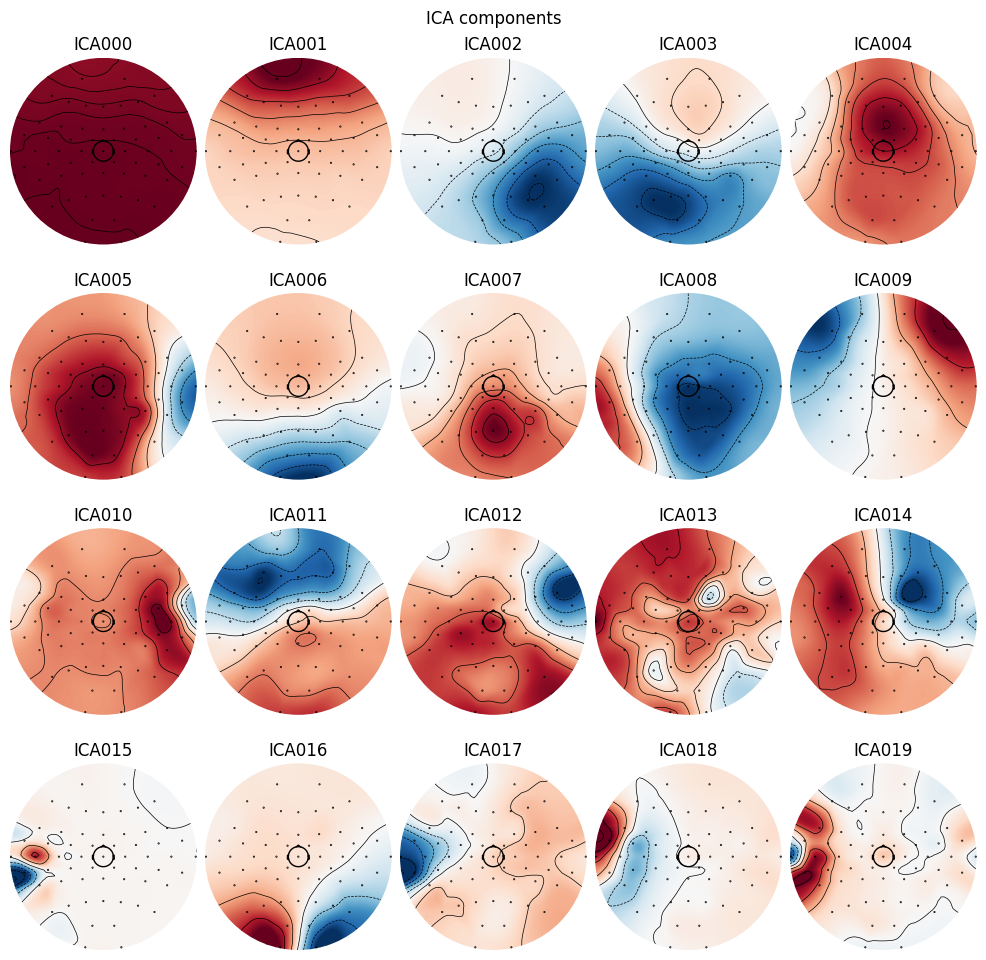

In [ ]:
ica.plot_components();

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated


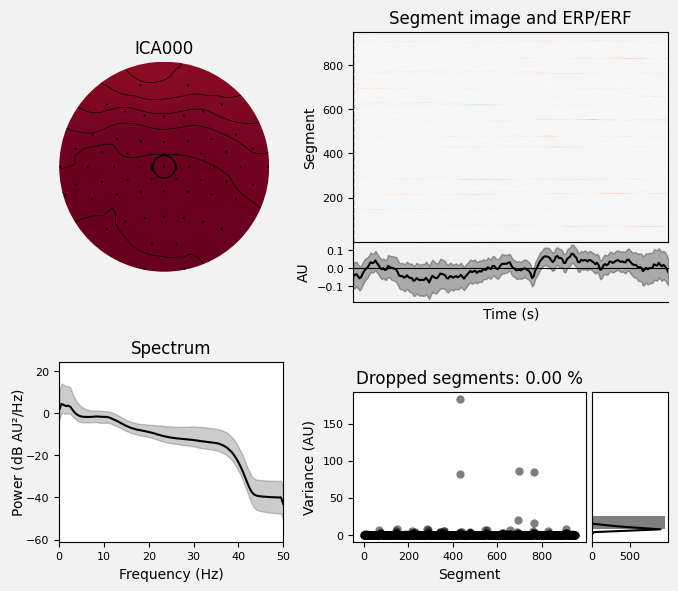

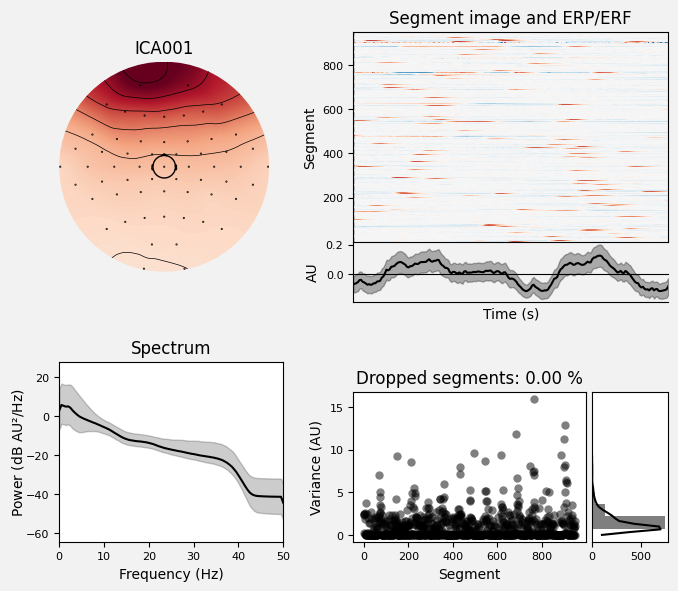

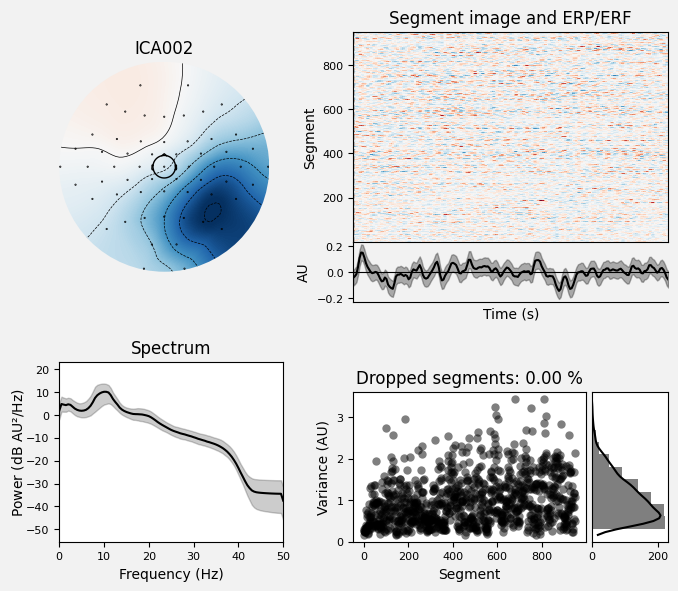

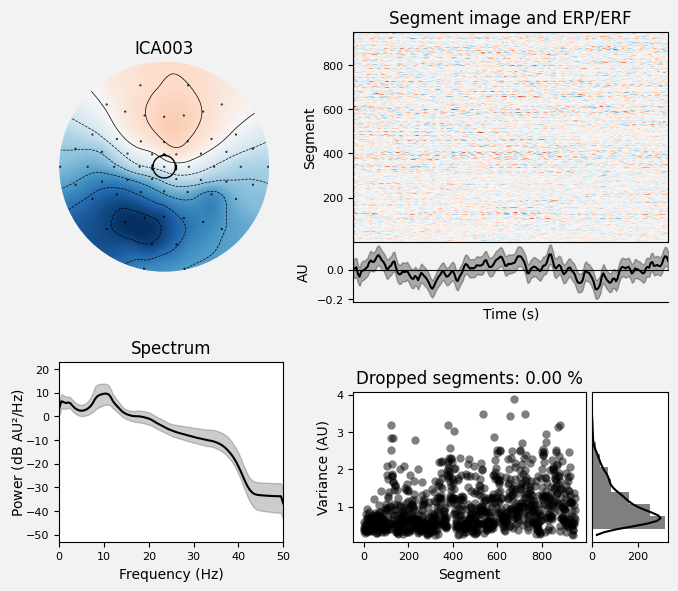

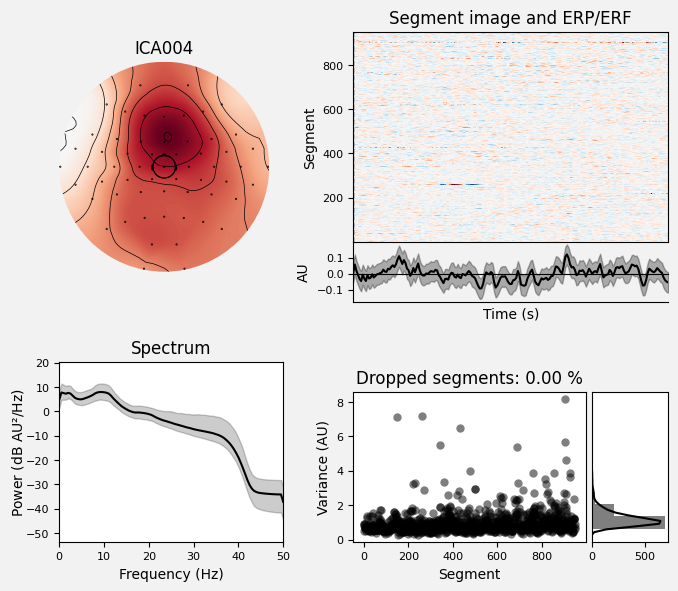

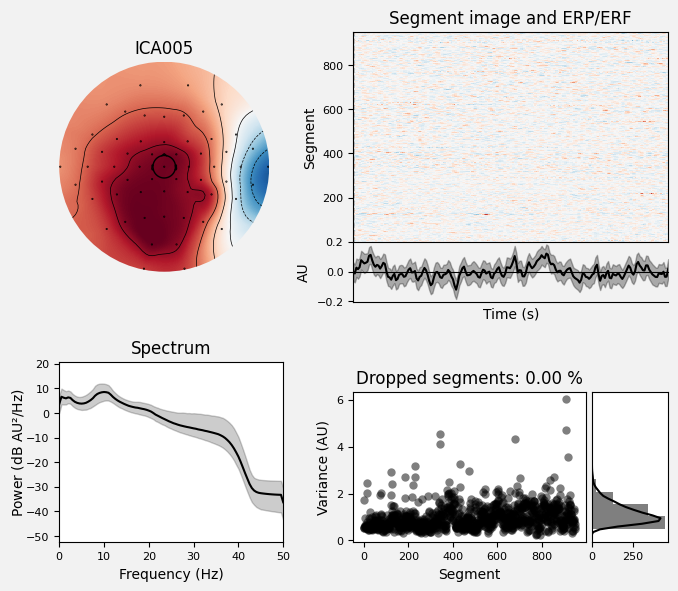

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [ ]:
idx = [0,1,2,3,4,5]  ## visualizing properties of each individual components
ica.plot_properties(raw,idx)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated


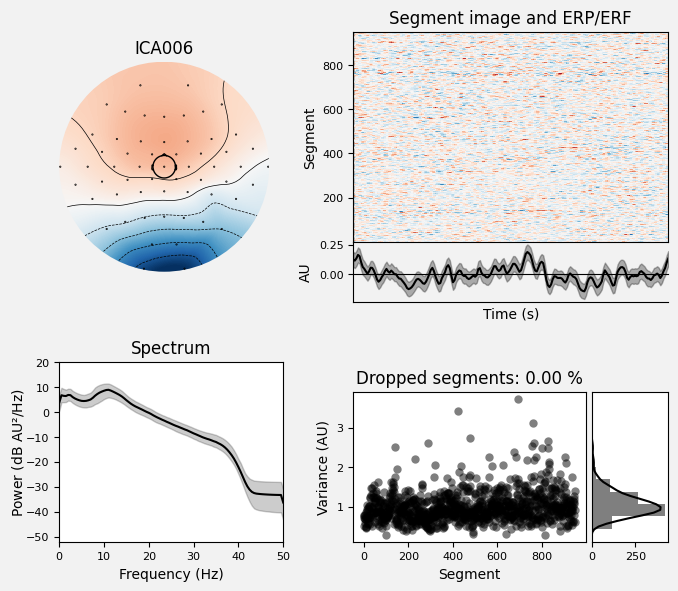

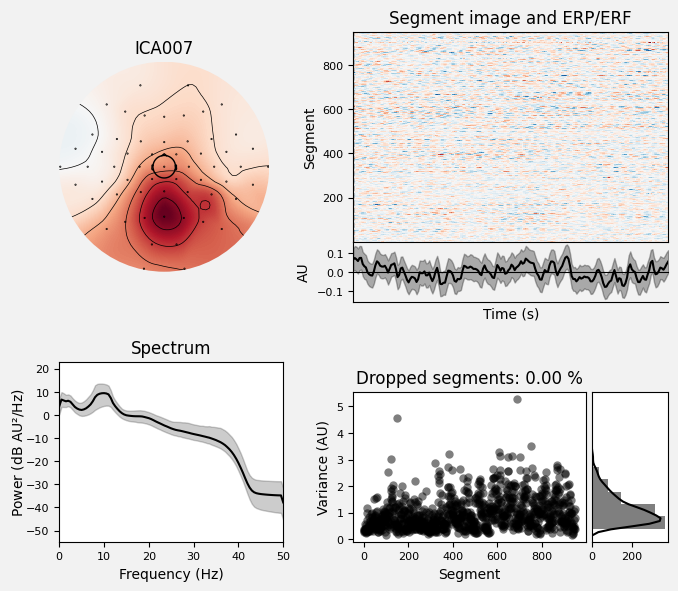

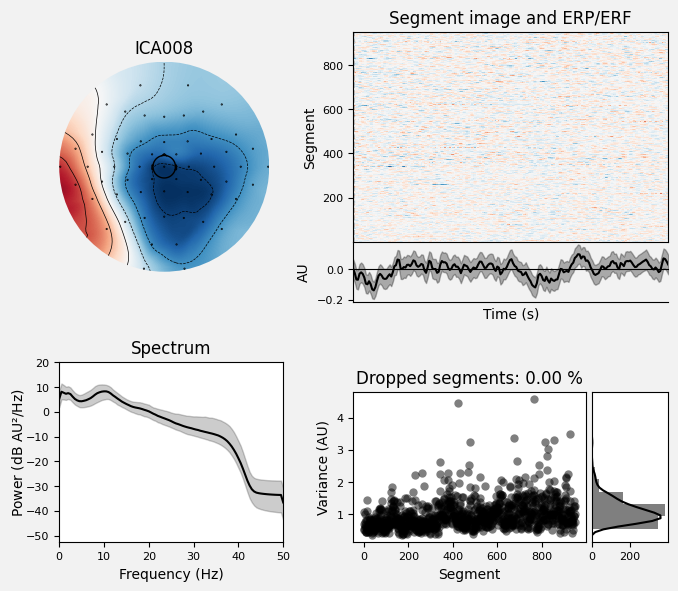

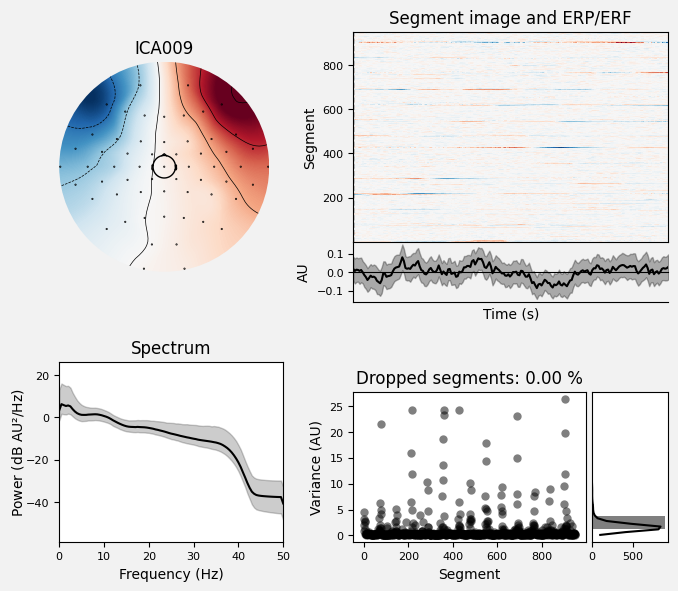

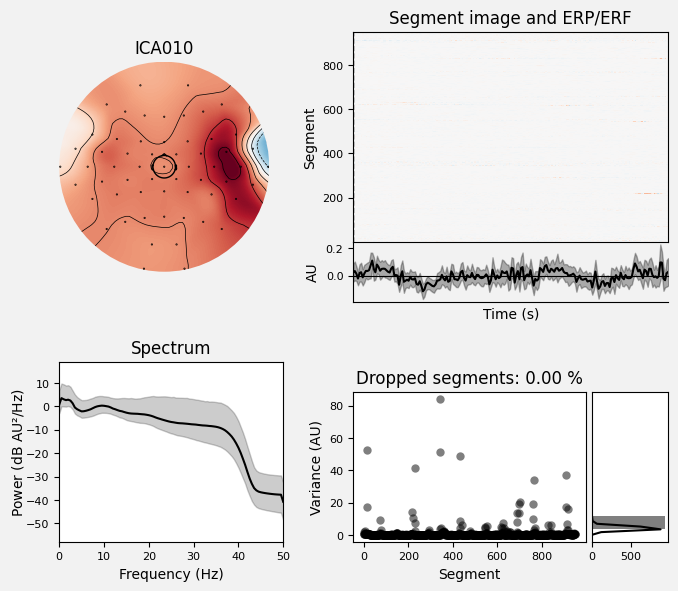

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [ ]:
idx = [6,7,8,9,10]
ica.plot_properties(raw,idx)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated


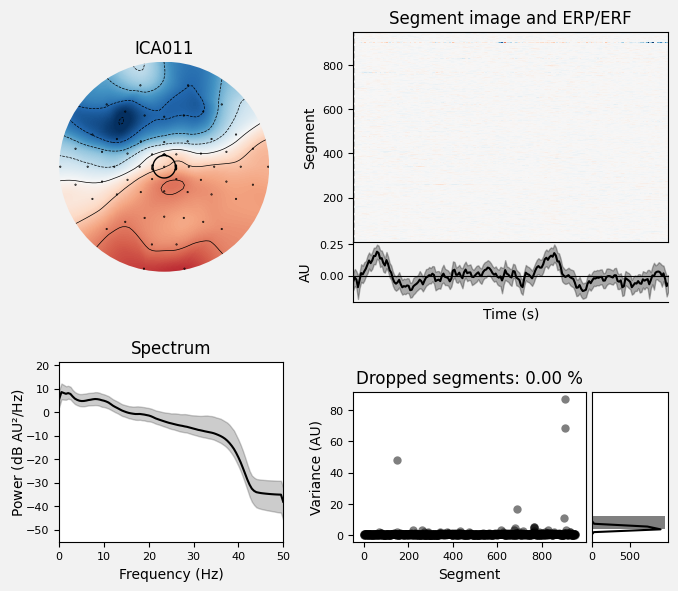

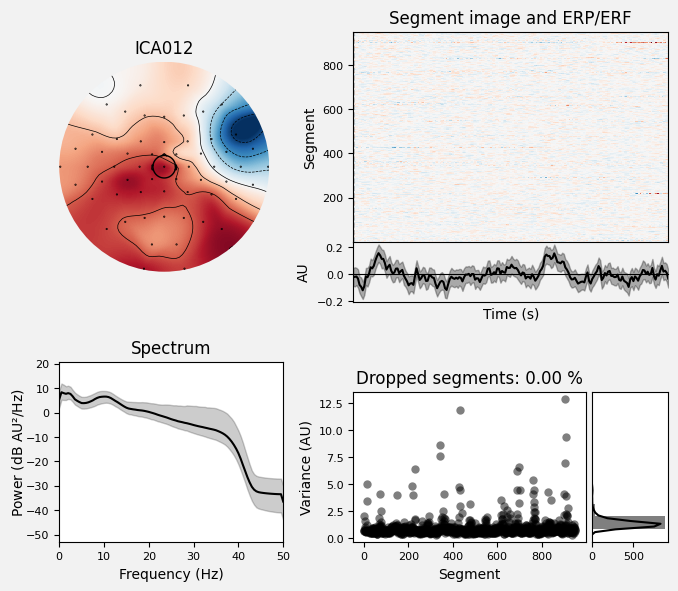

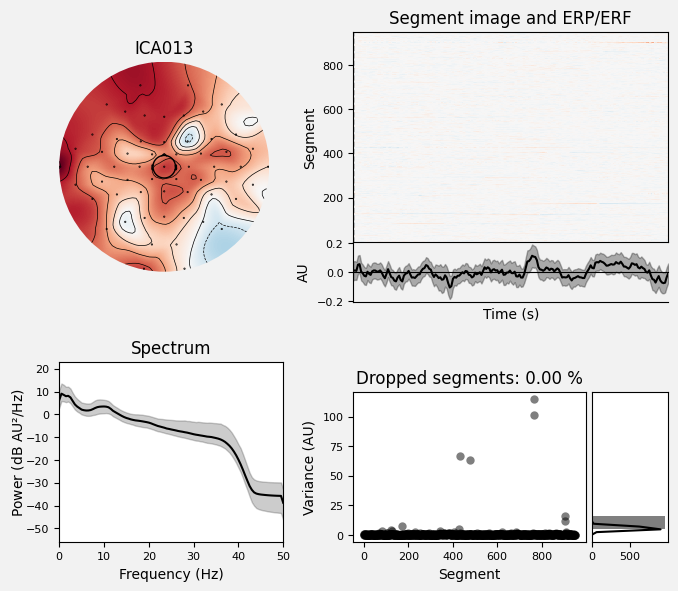

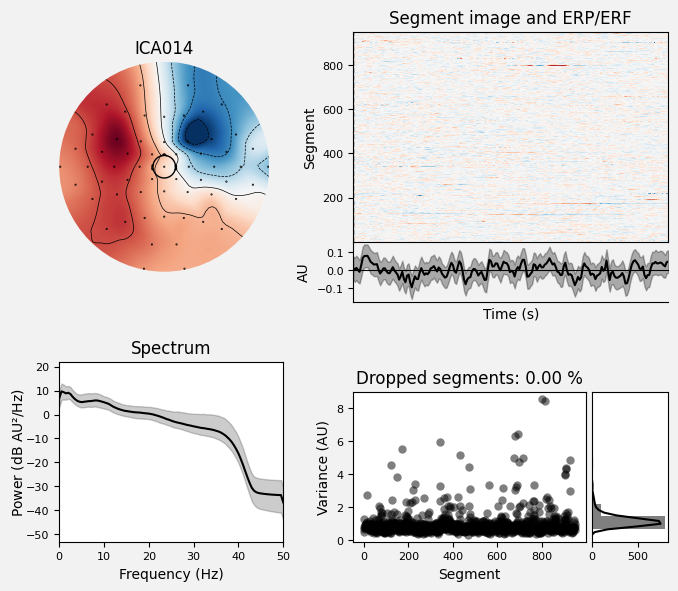

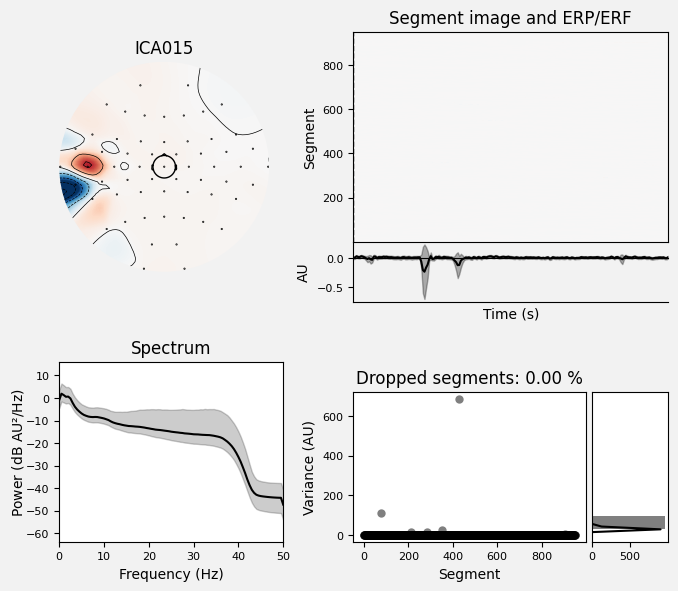

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [ ]:
idx = [11,12,13,14,15]
ica.plot_properties(raw,idx)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated


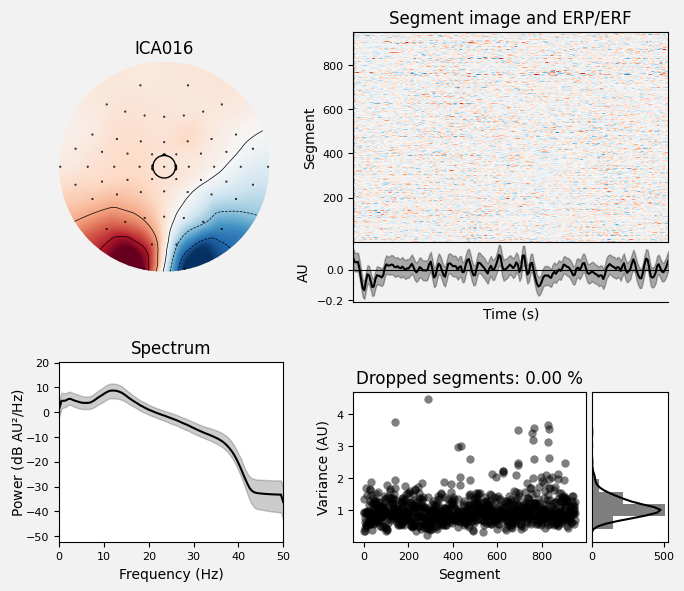

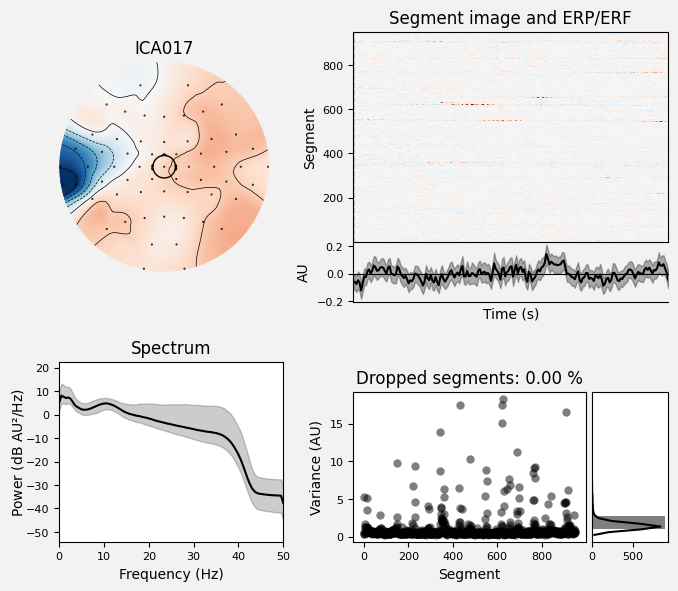

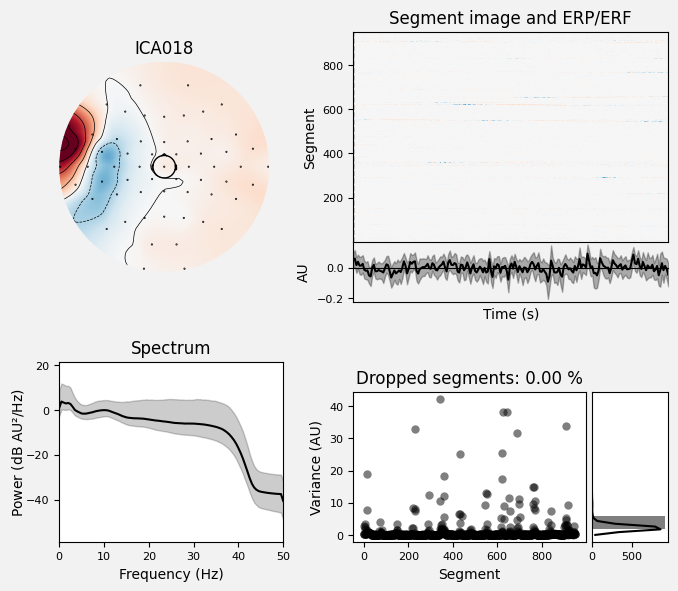

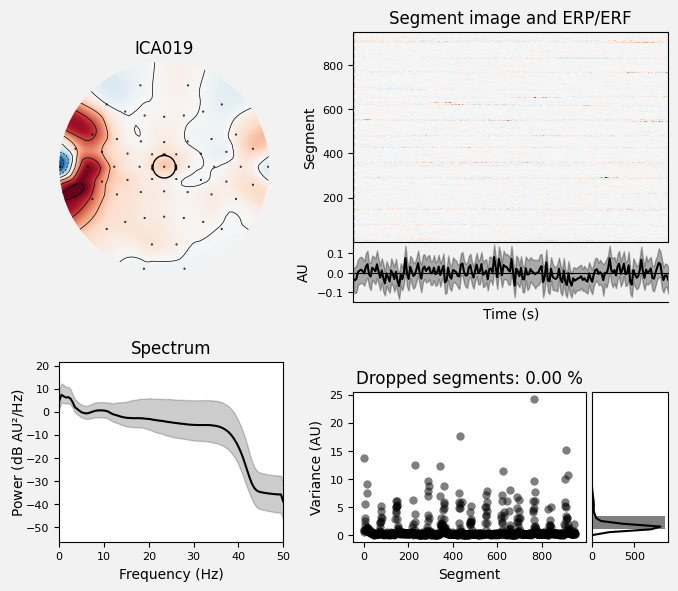

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [ ]:
idx = [16,17,18,19]
ica.plot_properties(raw,idx)

In [ ]:
bad_idx = [11,15,2,1,8,3]

In [ ]:
ica.exclude = bad_idx   ### removing some of the bad components
ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 59 PCA components


<RawArray | 59 x 190594 (1905.9 s), ~85.9 MB, data loaded>

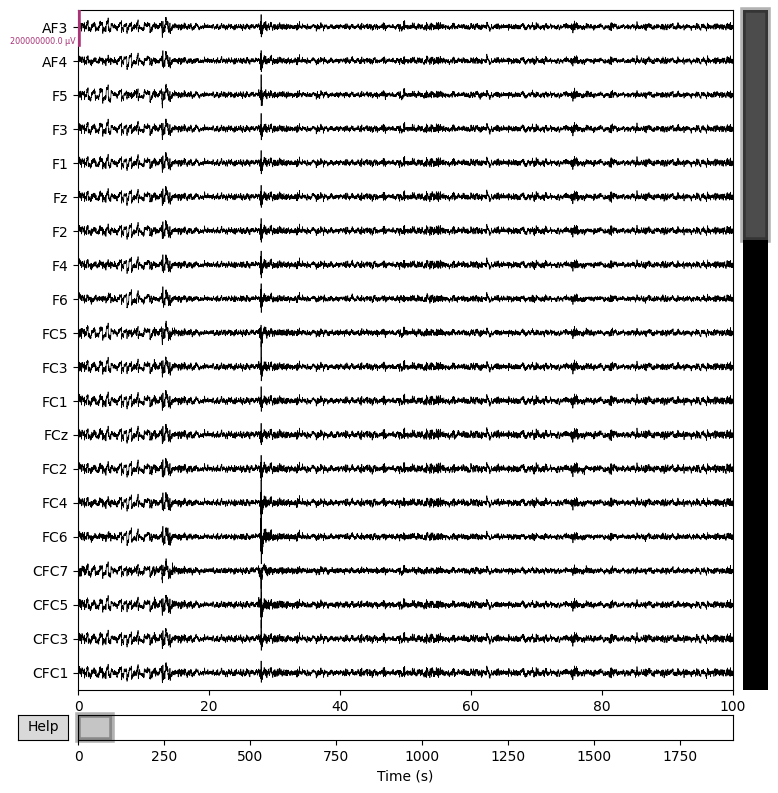

In [ ]:
raw.plot(duration=100.0, scalings={'eeg': 100});  ## visualizing after using ica

In [ ]:
event_id = {'first_type': -1, 'second_type': 1}
y = data['mrk']['y'][0,0].flatten()
pos = data['mrk']['pos'][0,0].flatten()
events = np.column_stack((pos, np.zeros_like(pos), y))
events    ## finding events in our data

array([[  2091,      0,      1],
       [  2891,      0,      1],
       [  3691,      0,     -1],
       [  4491,      0,      1],
       [  5291,      0,      1],
       [  6091,      0,      1],
       [  6891,      0,      1],
       [  7692,      0,     -1],
       [  8492,      0,     -1],
       [  9292,      0,      1],
       [ 10092,      0,     -1],
       [ 10892,      0,      1],
       [ 11692,      0,     -1],
       [ 12492,      0,     -1],
       [ 13292,      0,     -1],
       [ 16294,      0,      1],
       [ 17094,      0,     -1],
       [ 17894,      0,     -1],
       [ 18694,      0,      1],
       [ 19494,      0,     -1],
       [ 20294,      0,      1],
       [ 21094,      0,      1],
       [ 21894,      0,     -1],
       [ 22694,      0,     -1],
       [ 23494,      0,     -1],
       [ 24294,      0,     -1],
       [ 25094,      0,     -1],
       [ 25894,      0,      1],
       [ 26694,      0,     -1],
       [ 27494,      0,     -1],
       [ 3

In [ ]:
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.5, tmax=2, baseline=None, preload=True)
 ## creating epochs to further process the data

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 200 events and 251 original time points ...
0 bad epochs dropped


Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 59 PCA components


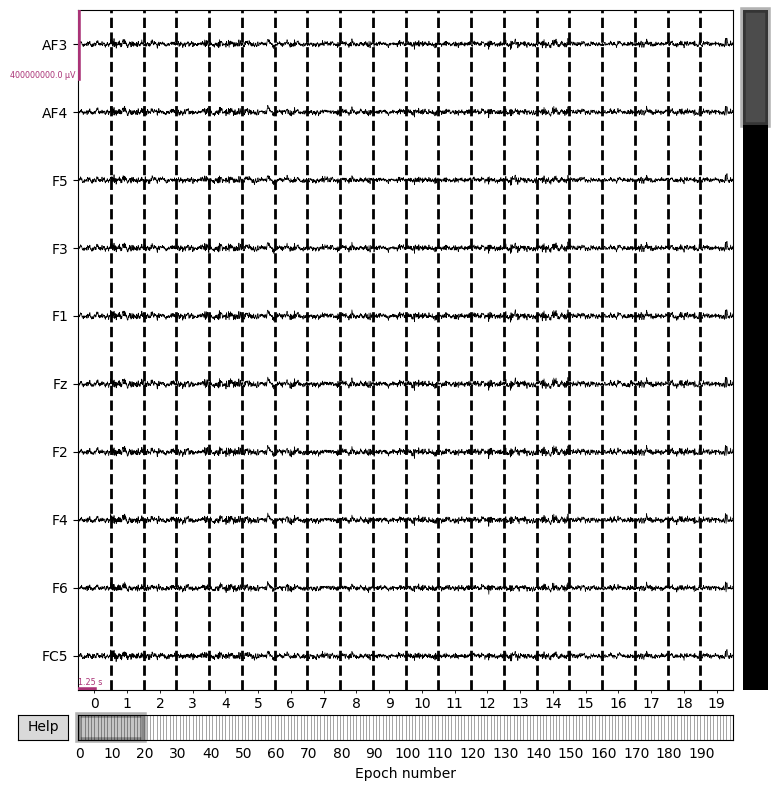

In [ ]:
epochs = ica.apply(epochs, exclude=ica.exclude)
epochs.plot(n_channels=10, scalings={'eeg': 200});  ## removing the bad_idx and visualizing the epoched data

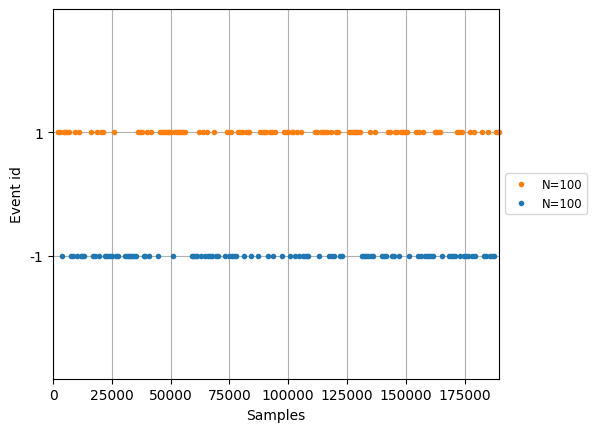

In [ ]:
mne.viz.plot_events(events[:200]); ## visualizing the events

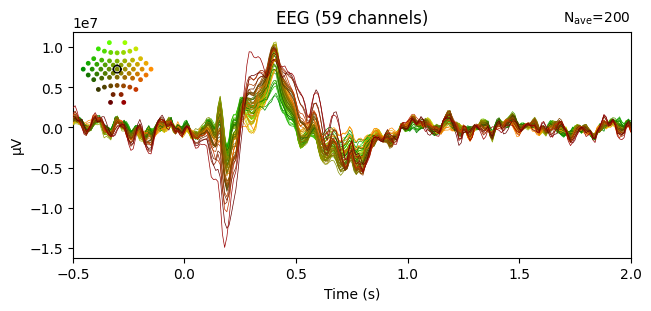

In [ ]:
epochs.average().plot(spatial_colors=True);  ## plotting the evoked data

In [ ]:
first = epochs['first_type'].average()
second = epochs['second_type'].average()

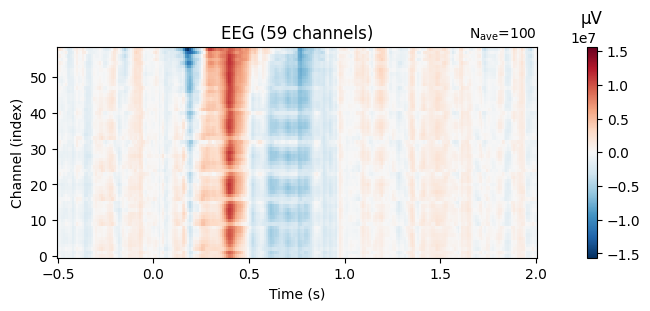

In [ ]:
first.plot_image();  ## visualizing our first event type

No projector specified for this dataset. Please consider the method self.add_proj.


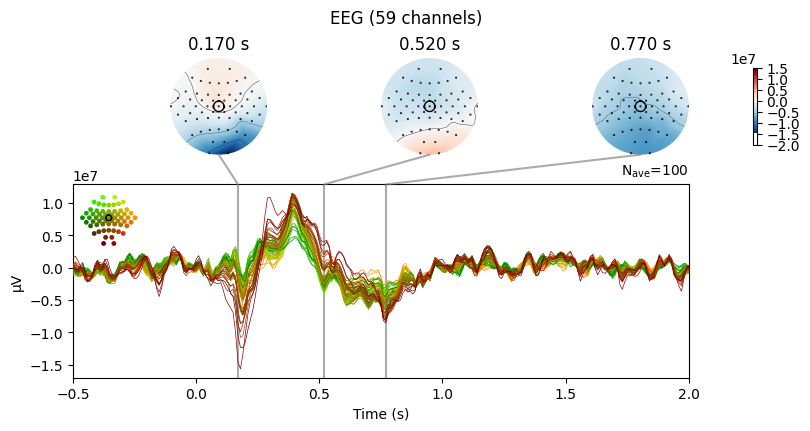

In [ ]:
first.plot_joint();

No projector specified for this dataset. Please consider the method self.add_proj.


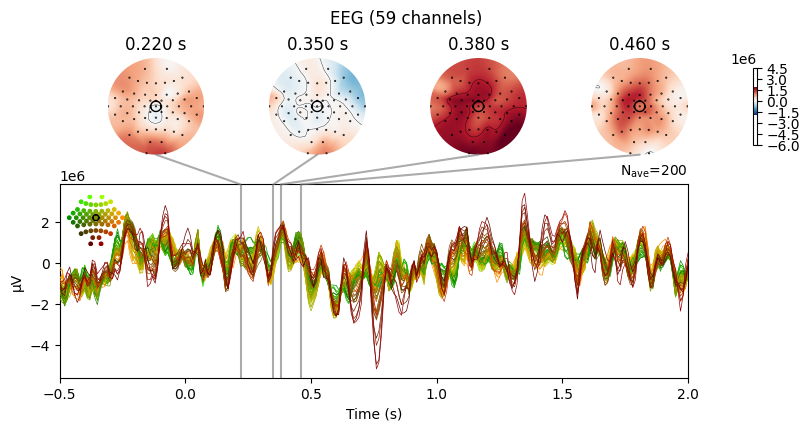

In [ ]:
diff = mne.combine_evoked((first,-second),weights='equal')
diff.plot_joint(times=[0.22,.35,0.38,0.46]);   ## plotting the difference of events